In [1]:
import csv

partition = "gpu_requeue"

In [2]:
filename = open('/n/holylabs/LABS/rc_admin/Lab/pedmon/slurm-stats/data/%s.csv' % partition,'r')


In [3]:
file = csv.DictReader(filename)

jobid = []
alloccpus = []
elapsedraw = []
timelimitraw = []
user = []
account = []

for col in file:
    jobid.append(col['JobID'])
    user.append(col['User'])
    account.append(col['Account'])
    alloccpus.append(col['AllocCPUS'])
    elapsedraw.append(col['ElapsedRaw'])
    timelimitraw.append(col['TimelimitRaw'])


In [4]:
elapsed = list(range(len(elapsedraw)))
timelimit = list(range(len(timelimitraw)))
userave = {}
accountave = {}
usermax = {}
accountmax = {}
usercount = {}
accountcount = {}

for i in range(len(elapsedraw)):
    elapsed[i] = float(elapsedraw[i])/60.0/60.0
    if timelimitraw[i] == '':
        timelimitraw[i] = elapsedraw[i]

    timelimit[i] = float(timelimitraw[i])/60.0
    if userave.get(user[i]) == None:
        userave.update({user[i]: elapsed[i]})
        usermax.update({user[i]: elapsed[i]})
        usercount.update({user[i]: 1})
    else:
        userave[user[i]] = userave[user[i]] + elapsed[i]
        usermax[user[i]] = max(usermax[user[i]], elapsed[i])
        usercount[user[i]] = usercount[user[i]] + 1
    
    if accountave.get(account[i]) == None:
        accountave.update({account[i]: elapsed[i]})
        accountmax.update({account[i]: elapsed[i]})
        accountcount.update({account[i]: 1})
    else:
        accountave[account[i]] = accountave[account[i]] + elapsed[i]
        accountmax[account[i]] = max(accountmax[account[i]], elapsed[i])
        accountcount[account[i]] = accountcount[account[i]] + 1

for u in userave:
    userave[u] = userave[u]/float(usercount[u])
    
for u in accountave:
    accountave[u] = accountave[u]/float(accountcount[u])
    
print("Number of Jobs:", len(elapsed), "Number of Users:", len(userave), "Number of Accounts:", len(accountave))

Number of Jobs: 307110 Number of Users: 664 Number of Accounts: 450


In [5]:
from matplotlib import pyplot as plt
import numpy as np


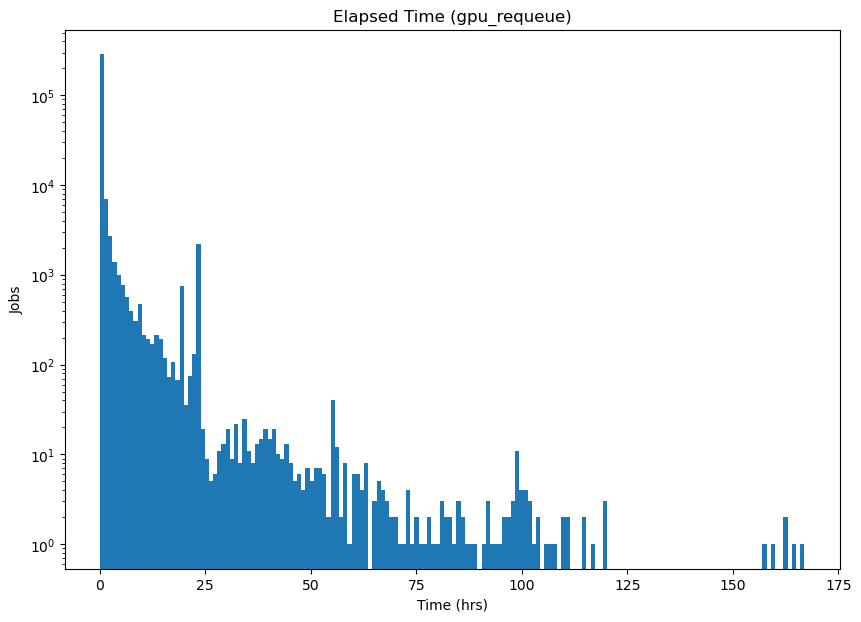

In [6]:
fig, ex = plt.subplots(figsize = (10, 7))
ex.hist(elapsed, bins = 168, log=True)
plt.xlabel("Time (hrs)")
plt.ylabel("Jobs")
plt.title("Elapsed Time (%s)" % partition)

plt.show()

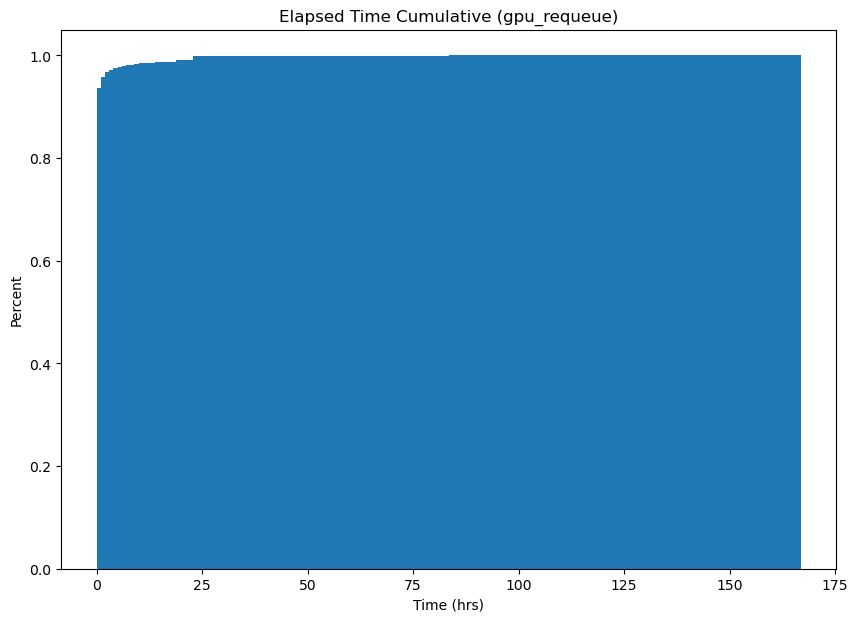

In [7]:
fig, cex = plt.subplots(figsize = (10, 7))
cex.hist(elapsed, bins = 168, stacked = True, cumulative = True, density = True)
plt.xlabel("Time (hrs)")
plt.ylabel("Percent")
plt.title("Elapsed Time Cumulative (%s)" % partition)

plt.show()

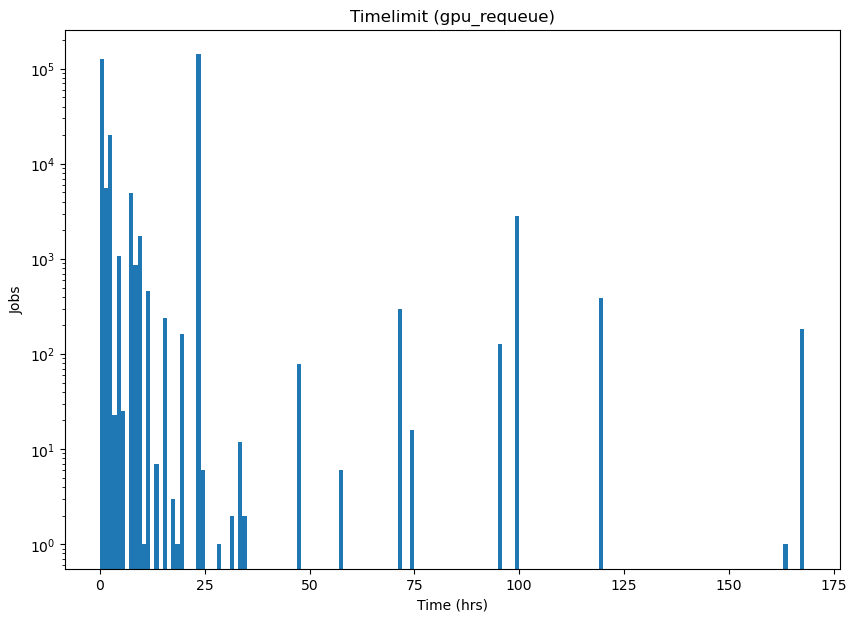

In [8]:
fig, tx = plt.subplots(figsize = (10, 7))
tx.hist(timelimit, bins = 168, log=True)
plt.xlabel("Time (hrs)")
plt.ylabel("Jobs")
plt.title("Timelimit (%s)" % partition)

plt.show()

In [9]:
welapsed = []
wtimelimit = []

for i in range(len(elapsed)):
    for j in range(int(alloccpus[i])):
        welapsed.append(elapsed[i])
        wtimelimit.append(timelimit[i])

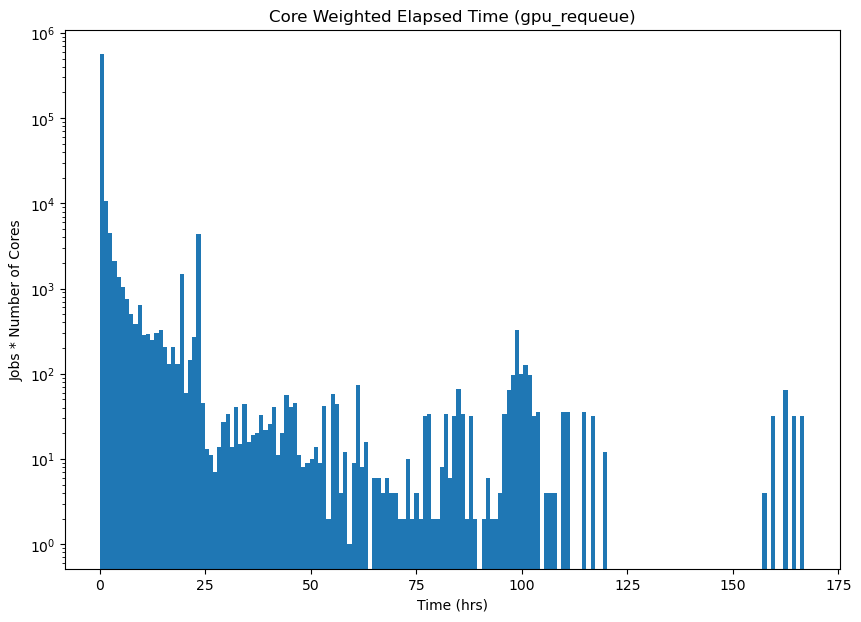

In [10]:
fig, wex = plt.subplots(figsize = (10, 7))
wex.hist(welapsed, bins = 168, log=True)

plt.xlabel("Time (hrs)")
plt.ylabel("Jobs * Number of Cores")
plt.title("Core Weighted Elapsed Time (%s)" % partition)

plt.show()

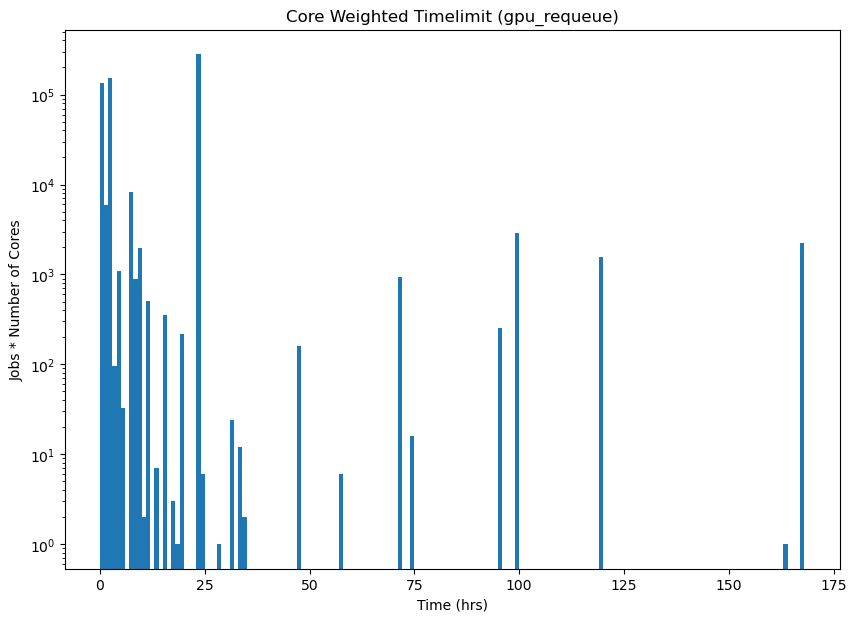

In [11]:
fig, wtx = plt.subplots(figsize = (10, 7))
wtx.hist(wtimelimit, bins = 168, log=True)

plt.xlabel("Time (hrs)")
plt.ylabel("Jobs * Number of Cores")
plt.title("Core Weighted Timelimit (%s)" % partition)

plt.show()

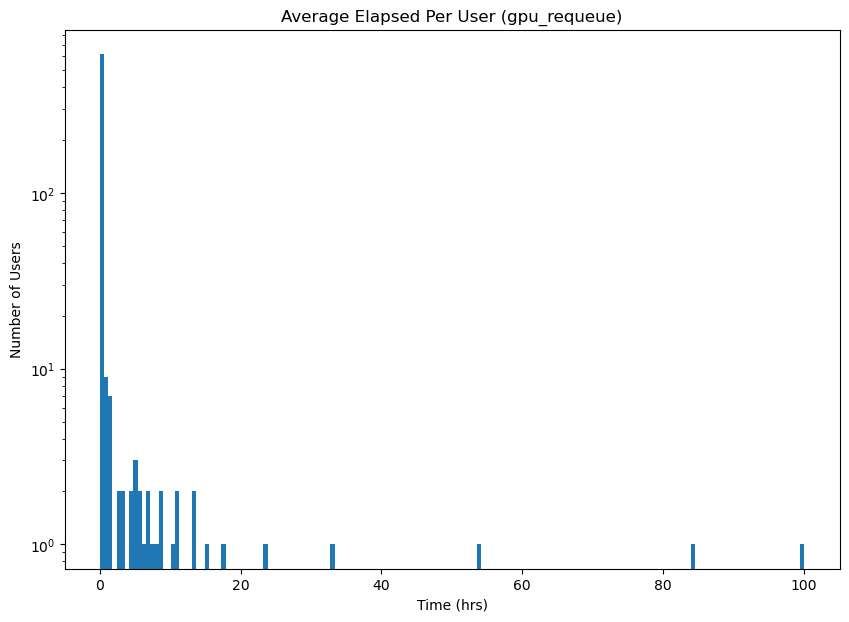

In [12]:
useravel = []
for key in userave.keys():
    useravel.append(userave[key])

fig, uax = plt.subplots(figsize = (10, 7))
uax.hist(useravel, bins = 168, log=True)

plt.xlabel("Time (hrs)")
plt.ylabel("Number of Users")
plt.title("Average Elapsed Per User (%s)" % partition)

plt.show()

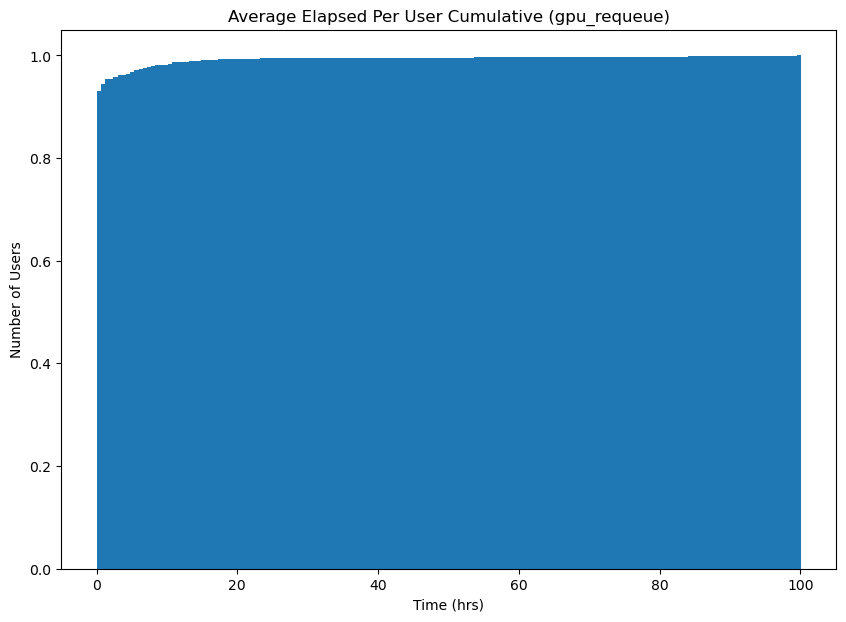

In [13]:
fig, cuax = plt.subplots(figsize = (10, 7))
cuax.hist(useravel, bins = 168, stacked = True, cumulative = True, density = True)

plt.xlabel("Time (hrs)")
plt.ylabel("Number of Users")
plt.title("Average Elapsed Per User Cumulative (%s)" % partition)

plt.show()

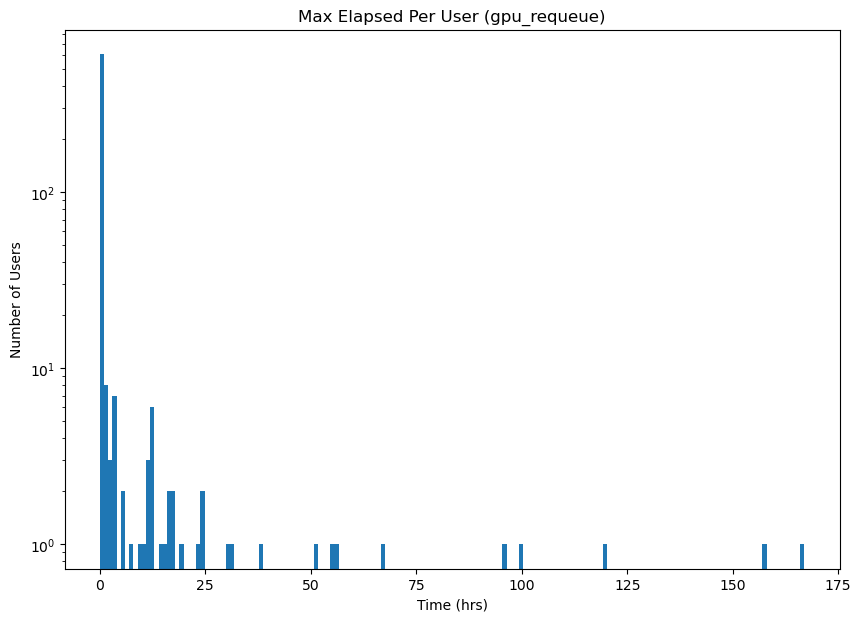

In [14]:
usermaxl = []
for key in usermax.keys():
    usermaxl.append(usermax[key])

fig, umx = plt.subplots(figsize = (10, 7))
umx.hist(usermaxl, bins = 168, log = True)

plt.xlabel("Time (hrs)")
plt.ylabel("Number of Users")
plt.title("Max Elapsed Per User (%s)" % partition)

plt.show()

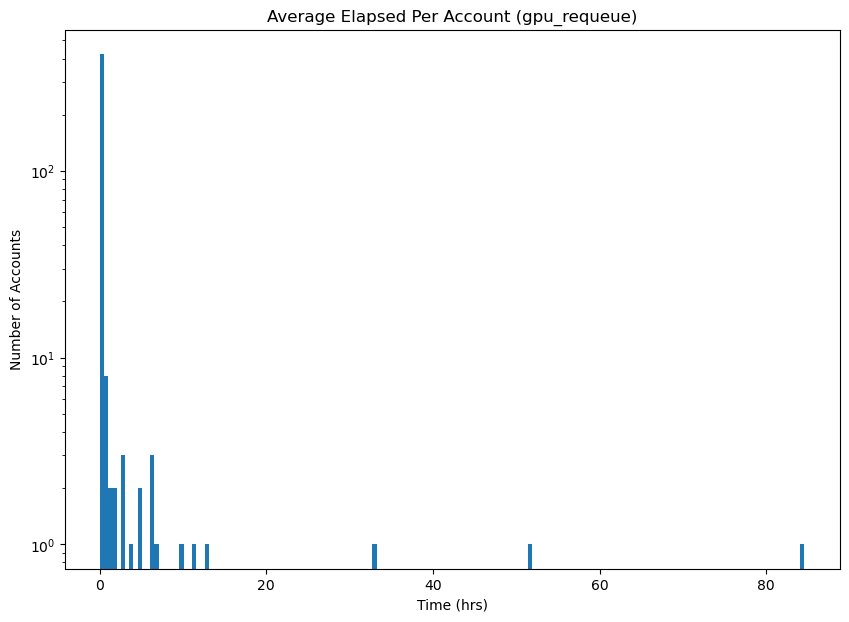

In [15]:
accountavel = []
for key in accountave.keys():
    accountavel.append(accountave[key])

fig, aax = plt.subplots(figsize = (10, 7))
aax.hist(accountavel, bins = 168, log = True)

plt.xlabel("Time (hrs)")
plt.ylabel("Number of Accounts")
plt.title("Average Elapsed Per Account (%s)" % partition)

plt.show()

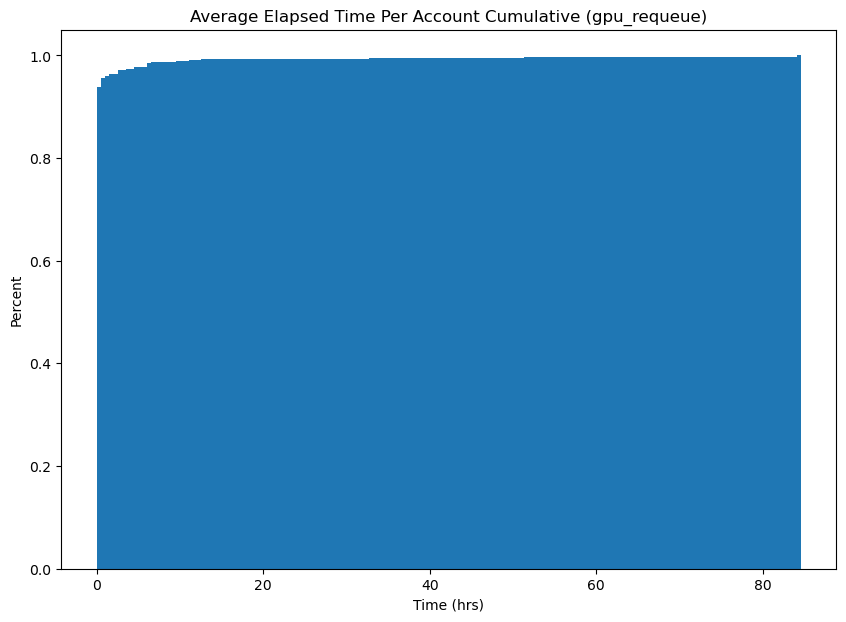

In [16]:
fig, caax = plt.subplots(figsize = (10, 7))
caax.hist(accountavel, bins = 168, stacked = True, cumulative = True, density = True)
plt.xlabel("Time (hrs)")
plt.ylabel("Percent")
plt.title("Average Elapsed Time Per Account Cumulative (%s)" % partition)

plt.show()

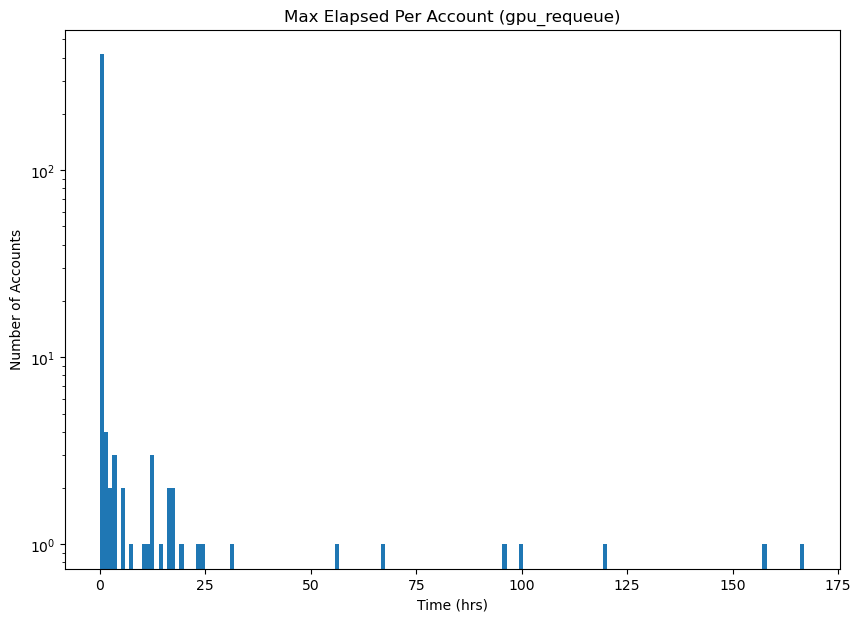

In [17]:
accountmaxl = []
for key in accountmax.keys():
    accountmaxl.append(accountmax[key])

fig, amx = plt.subplots(figsize = (10, 7))
amx.hist(accountmaxl, bins = 168, log = True)

plt.xlabel("Time (hrs)")
plt.ylabel("Number of Accounts")
plt.title("Max Elapsed Per Account (%s)" % partition)

plt.show()

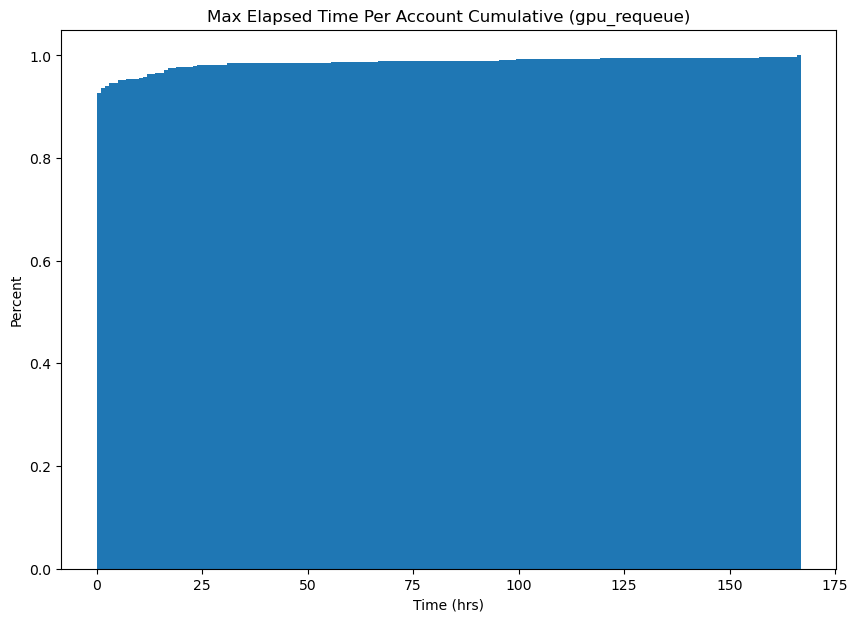

In [18]:
fig, camx = plt.subplots(figsize = (10, 7))
camx.hist(accountmaxl, bins = 168, stacked = True, cumulative = True, density = True)
plt.xlabel("Time (hrs)")
plt.ylabel("Percent")
plt.title("Max Elapsed Time Per Account Cumulative (%s)" % partition)

plt.show()